In [157]:
from skimage.io import imread, imshow
from skimage import img_as_float, img_as_ubyte
from scipy.signal import convolve2d
%matplotlib inline
import numpy as np

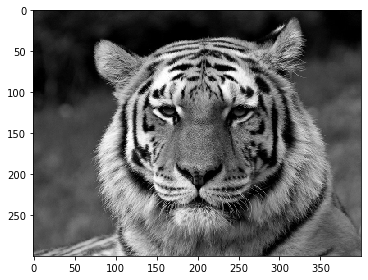

In [158]:
img = imread('tiger-gray-small.png')
imshow(img)

In [190]:
img_c = img.copy()[2:img.shape[0]-2,2:img.shape[1]-2]
box_kernel = np.array([[1]*5]*5)/25 
def get5x5(img, x, y):
    arr = img[x-2:x+3, y-2:y+3]
    #print(arr)
    return arr
def box5x5(img, x, y):
    arr = img[x-2:x+3, y-2:y+3]
    res = 0
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            res += arr[i,j]
    return res//25
convolve2d(get5x5(img, 100, 100), box_kernel, mode='valid'), img[100,100], box5x5(img, 100, 100)

(array([[132.76]]), 164, 132)

In [191]:
x, y = 2, 2
print(img[x-2:x+3, y-2:y+3])
img

[[38 36 36 36 38]
 [38 36 37 38 40]
 [40 37 38 39 41]
 [38 37 41 42 42]
 [39 45 39 42 40]]


array([[ 38,  36,  36, ...,   1,   2,   2],
       [ 38,  36,  37, ...,   1,   2,   1],
       [ 40,  37,  38, ...,   2,   2,   2],
       ...,
       [141, 141, 137, ..., 117, 110, 111],
       [111, 101,  95, ..., 114, 122, 112],
       [ 97,  97, 109, ..., 123, 113, 116]], dtype=uint8)

In [196]:
for i in range(2, img.shape[0]-2):
    for j in range(2, img.shape[1]-2):
        #img_c[i,j] = int(convolve2d(get5x5(img, i, j), box_kernel, mode='valid')[0][0])
        img_c[i-2,j-2] = box5x5(img, i, j)

296 396


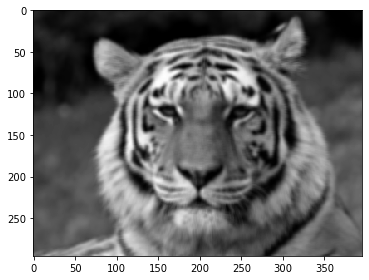

In [198]:
print(img_c.shape[0], img_c.shape[1])
imshow(img_c)

296 396


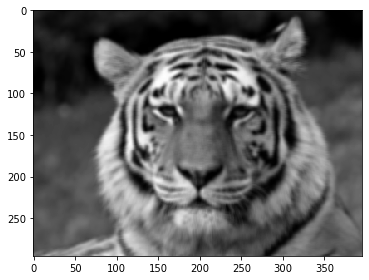

In [199]:
img2 = imread('box-tiger.png')
print(img_c.shape[0], img_c.shape[1])
imshow(img2)

In [200]:
np.array_equal(img_c, img2)

True

In [173]:
img_c -img2

array([[  0,   0,   1, ...,   0,   2,   0],
       [  2,   2,   2, ...,   1,   1,   0],
       [255,   1, 253, ..., 255, 255, 255],
       ...,
       [  9,  11, 234, ..., 246, 247, 248],
       [ 41,  24, 250, ..., 247, 247, 249],
       [ 17,   6,   4, ..., 248, 248, 250]], dtype=uint8)

In [ ]:
from skimage.io import imread, imsave
from scipy.signal import convolve2d
import numpy as np

img = imread('img.png')
img_c = img.copy()[2:img.shape[0]-1,2:img.shape[1]-1]
'''
box_kernel = np.array([[1]*5]*5)/25 
def get5x5(img, x, y):
    arr = img[x-2:x+3, y-2:y+3]
    return arr
for i in range(2, img_c.shape[0]-2):
    for j in range(2, img_c.shape[1]-2):
        img_c[i,j] = int(convolve2d(get5x5(img, i, j), box_kernel, mode='valid')[0][0])
imsave('out_img.png', img_c)
'''
img_c = convolve2d(img_c, np.ones((5, 5)))
imsave('out_img.png', img_c, cmap='gray')